In [1]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.7.0


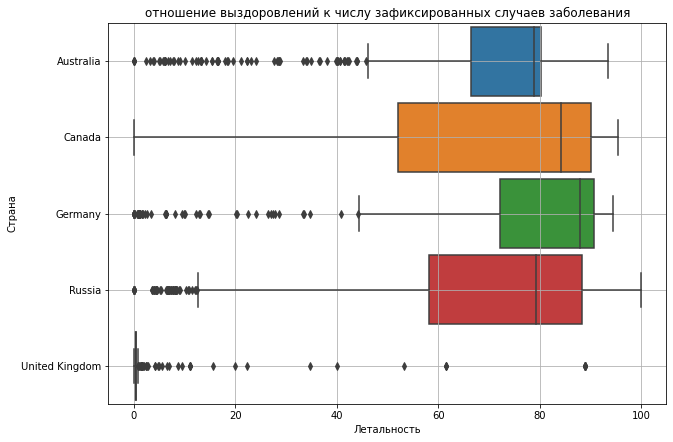

In [19]:

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('отношение выздоровлений к числу зафиксированных случаев заболевания');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Text(0.5, 1.0, 'Тепловая карта роста заболевших')

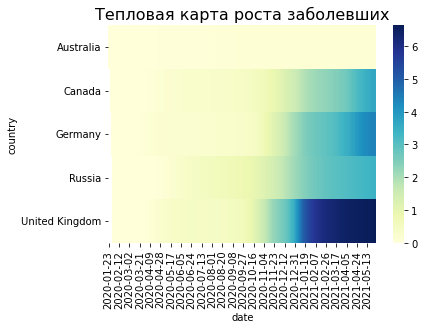

In [18]:
pivot2 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot2.columns = pivot2.columns.astype('string')
heatmap = sns.heatmap(data=pivot2, cmap='YlGnBu')
heatmap.set_title('Тепловая карта роста заболевших', fontsize=16)

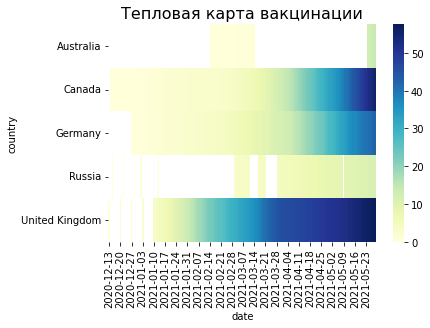

In [17]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

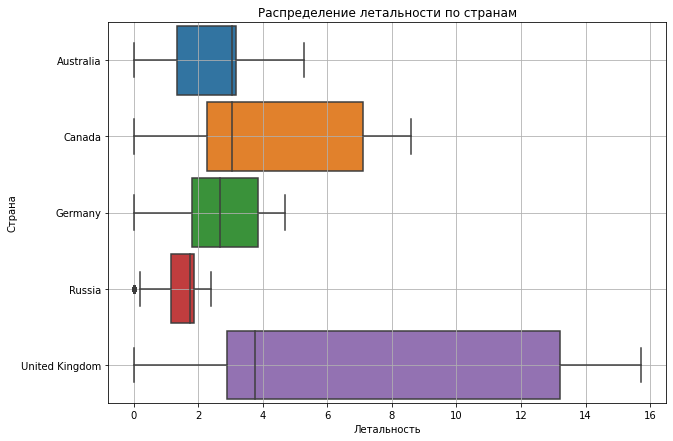

In [16]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

<AxesSubplot:xlabel='daily_confirmed_per_hundred', ylabel='country'>

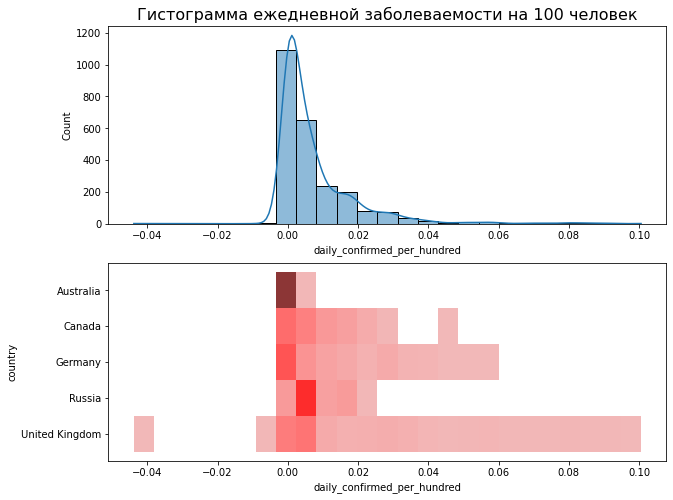

In [15]:
import seaborn as sns
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)

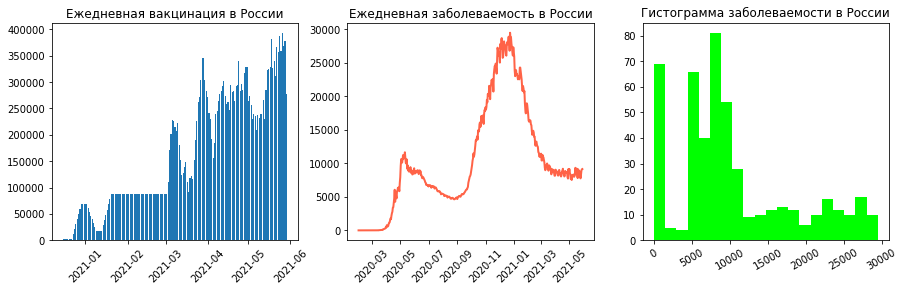

In [14]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

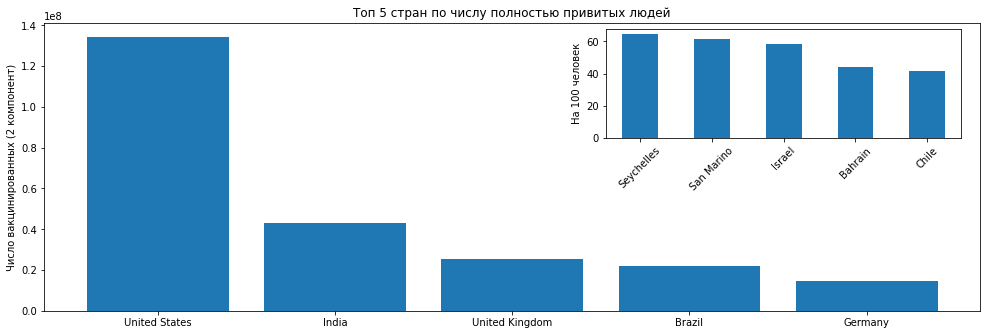

In [13]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

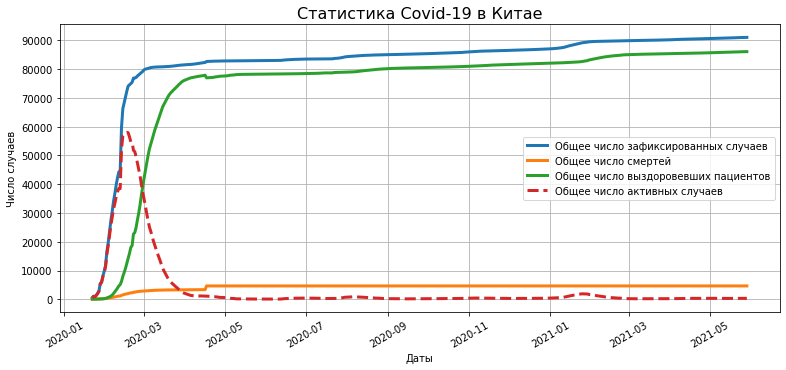

In [12]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

([<matplotlib.patches.Wedge at 0x1bc067bb880>,
 [Text(0.6995604980755172, 0.848890516811405, 'Oxford/AstraZeneca'),
  Text(-0.7858288531813955, 0.7697226861068946, 'Pfizer/BioNTech'),
  Text(-1.0737492518932146, -0.23887767593218537, 'Sinopharm/Beijing'),
  Text(-0.6375806240742065, -0.8963765658500593, 'Moderna'),
  Text(0.009761828239201034, -1.09995668401507, 'SputnikV'),
  Text(0.5834629589773508, -0.9325078956777763, 'Johnson&Johnson'),
  Text(0.9574713497642411, -0.5415243432945952, 'Sinovac'),
  Text(1.088929522474283, -0.1556678999791865, 'other')],
 [Text(0.3815784534957366, 0.4630311909880391, '28.1%'),
  Text(-0.4286339199171248, 0.41984873787648797, '19.2%'),
  Text(-0.5856814101235716, -0.13029691414482839, '12.4%'),
  Text(-0.34777124949502164, -0.4889326722818505, '10.9%'),
  Text(0.005324633585018745, -0.599976373099129, '9.0%'),
  Text(0.31825252307855495, -0.5086406703696961, '8.5%'),
  Text(0.5222570998714041, -0.29537691452432463, '7.3%'),
  Text(0.5939615577132452,

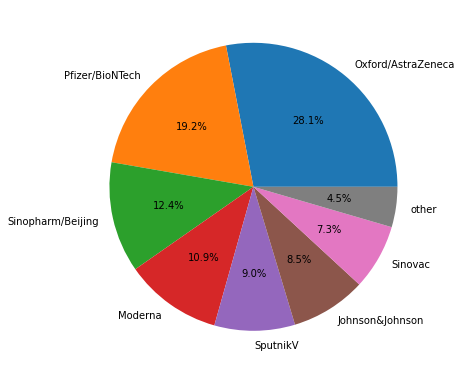

In [11]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
)

([<matplotlib.patches.Wedge at 0x1bc063a8a60>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

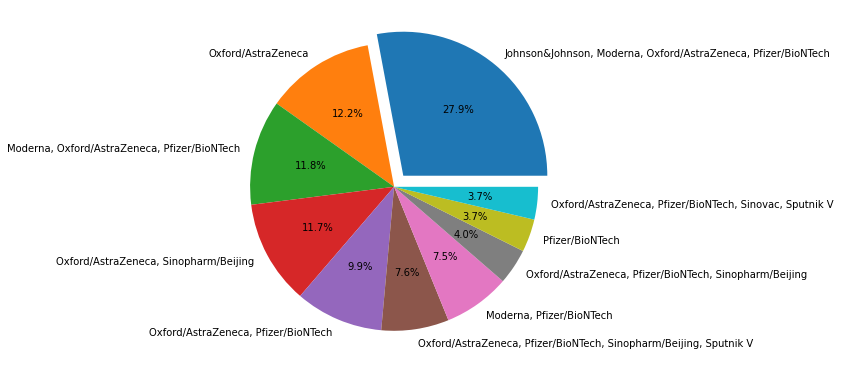

In [10]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)

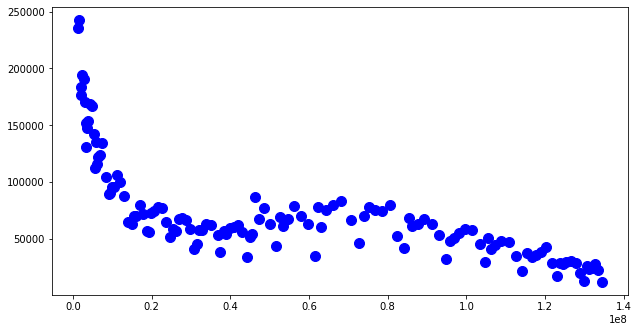

In [9]:
import matplotlib.pyplot as plt

us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
)

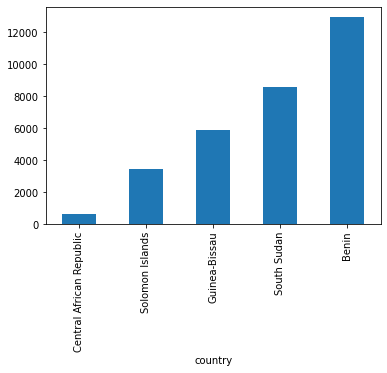

In [8]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

<AxesSubplot:xlabel='country'>

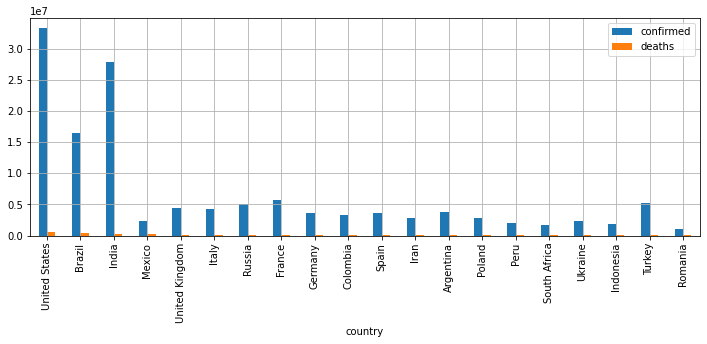

In [7]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(20, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
)

<AxesSubplot:xlabel='country'>

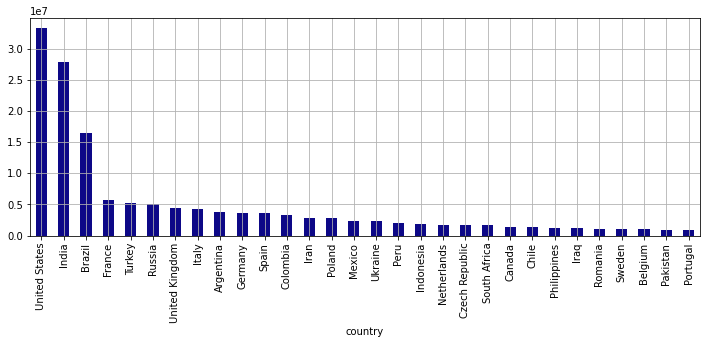

In [6]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(30)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)

<AxesSubplot:title={'center':'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

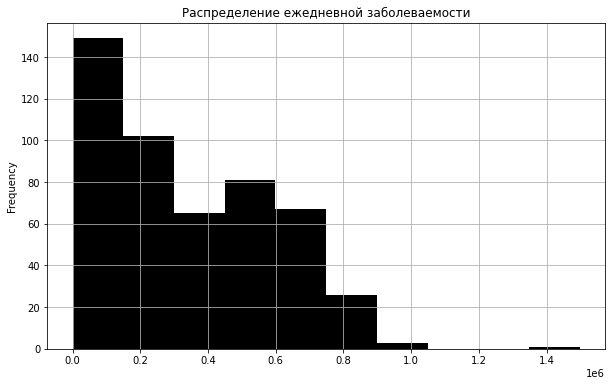

In [5]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
"""grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
)"""
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
)

In [4]:
mask_date = (covid_data['date'] >= '2020-01-22')&(covid_data['date'] <= '2021-05-29')
covid_df = covid_data.merge(vaccinations_data, on = ['country','date'], how = 'left')
#display (covid_df)
#covid_df.info()
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
display(covid_df['country'].value_counts())
display(covid_df[covid_df['country'] =='United States'].sort_values(by = 'death_rate'))
display(covid_df[covid_df['country'] =='Russia']['recover_rate'].mean())


Taiwan                 494
Japan                  494
Thailand               494
South Korea            494
United States          494
                      ... 
Channel Islands          1
Cape Verde               1
North Ireland            1
East Timor               1
Republic of Ireland      1
Name: country, Length: 221, dtype: int64

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
82542,2020-01-22,United States,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
82564,2020-02-13,United States,15.0,0.0,3.0,12.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20.000000
82565,2020-02-14,United States,15.0,0.0,3.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20.000000
82566,2020-02-15,United States,15.0,0.0,3.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20.000000
82567,2020-02-16,United States,15.0,0.0,3.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82657,2020-05-16,United States,1469104.0,89191.0,268376.0,1111537.0,25059.0,1209.0,17629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071115,18.268006
82654,2020-05-13,United States,1391915.0,84562.0,243430.0,1063923.0,20723.0,1700.0,13143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.075227,17.488855
82655,2020-05-14,United States,1418928.0,86357.0,246414.0,1086157.0,27013.0,1795.0,2984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.086073,17.366209
82656,2020-05-15,United States,1444045.0,87982.0,250747.0,1105316.0,25117.0,1625.0,4333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.092746,17.364210


67.06273489477655

In [3]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
#display(covid_data.head())
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.sort_values(by='date'))
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.sort_values(by='date'))

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
4056,2020-01-22,Japan,2.0,0.0,0.0,2.0,NaN,NaN,NaN
4055,2020-01-22,Hong Kong,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4054,2020-01-22,China,547.0,17.0,28.0,502.0,NaN,NaN,NaN
4061,2020-01-22,Thailand,4.0,0.0,2.0,2.0,NaN,NaN,NaN
4060,2020-01-22,Taiwan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45506,2021-05-29,Serbia,712046.0,6844.0,0.0,705202.0,274.0,10.0,0.0
45490,2021-05-29,Peru,1947555.0,68978.0,1897522.0,-18945.0,5501.0,162.0,4728.0
45433,2021-05-29,Iran,2893218.0,79741.0,2425033.0,388444.0,7107.0,173.0,14781.0
45523,2021-05-29,Syria,24440.0,1763.0,21593.0,1084.0,30.0,5.0,5.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca
